In [ ]:
# Sentiment Analysis of Social Media for Brand Monitoring

## Objective
The goal of this project is to perform sentiment analysis on tweets related to various brands to understand public sentiment. By analyzing these sentiments, businesses can gain insights into the public perception of their brand and identify areas for improvement.

## Dataset Overview
This dataset consists of tweets that have been labeled with sentiments toward the brands or products mentioned within. The sentiments are categorized as positive, negative, or neutral, providing a foundation for our analysis.


In [1]:
!pip install scikit-learn pandas matplotlib seaborn

In [5]:
import pandas as pd

# Full path to the dataset
file_path = r'C:\Users\ARUN\Downloads\projects DataAnalyst\project 1\archive (4)\Dataset - Train.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())
print(df.info())

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 3 columns):
 #  

In [6]:
# Basic data exploration
df.info()
df.describe(include='all')  # Include='all' to get summary statistics for all columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8588 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8589 non-null   object
dtypes: object(3)
memory usage: 201.4+ KB


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,8588,3291,8589
unique,8561,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [9]:
# Example of data cleaning
# Drop rows with missing sentiment values
df_clean = df.dropna(subset=())

# Show the cleaned data
df_clean.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [18]:
# Example of data cleaning
# Drop rows with missing sentiment values
#df_clean = df.dropna(subset=[])

# Drop an unnecessary column if exists
df_clean = df_clean.drop(columns=[])

# Show the cleaned data
df_clean.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
## Sentiment Distribution Visualization

Visualizing the distribution of sentiments among the tweets is crucial for understanding the overall public perception of the brands or products mentioned. This step helps us identify which sentiment is predominant in the dataset—positive, negative, or neutral. Such insights can inform businesses about the general sentiment toward their brand and guide strategies for improving customer satisfaction and engagement.


C:\Users\ARUN\AppData\Local\Temp\ipykernel_4356\780842418.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_there_an_emotion_directed_at_a_brand_or_product', palette='viridis')


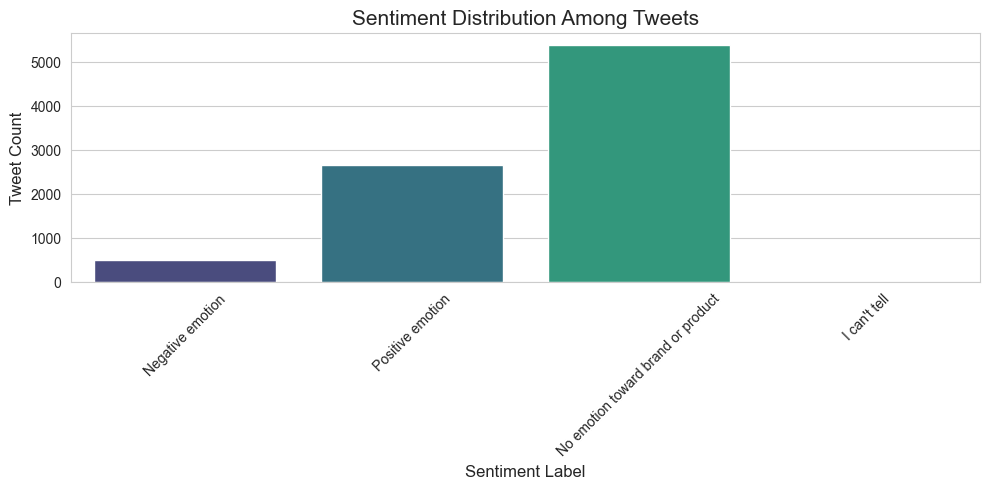

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path_to_file = 'C:\\Users\\ARUN\\Downloads\\projects DataAnalyst\\project 1\\archive (4)\\Dataset - Train.csv'  # Replace with the path to your dataset file
df = pd.read_csv(path_to_file)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualize the sentiment distribution
plt.figure(figsize=(10, 5))
# Use seaborn's countplot to visualize the count of different sentiments
# Replace 'is_there_an_emotion_directed_at_a_brand_or_product' with your column name if different
sns.countplot(data=df, x='is_there_an_emotion_directed_at_a_brand_or_product', palette='viridis')

# Adding a title to the plot and labels to the axes
plt.title('Sentiment Distribution Among Tweets', fontsize=15)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('Tweet Count', fontsize=12)

# Rotating the x-axis labels if they are not clear or overlapping
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

# Explanation in markdown for interpretation of the plot
# This plot helps us quickly grasp the sentiment bias in the dataset towards positive, negative, or neutral responses.


In [ ]:
## Model Building and Evaluation

In this step, we will build a machine learning model to classify the sentiment of each tweet. We'll use a logistic regression model for this task because it is effective for binary classification problems and can be extended to multiclass classification. Logistic regression is also a good baseline for text classification tasks due to its simplicity and interpretability.

We will first transform the tweet texts into a numerical format that the model can understand using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. This method weighs the words in each tweet to reflect how important they are in that tweet and the entire collection of tweets.

After transforming the texts, we will split the data into a training set and a test set. The training set will be used to train the model, and the test set will be used to evaluate the model's performance. We will assess the model's performance using accuracy and a classification report, which provides detailed metrics such as precision, recall, and F1-score for each class.


In [24]:
# Drop rows where the text is NaN (remove this line if you prefer to fill NaN values instead)
df = df.dropna(subset=['tweet_text'])

# Or replace NaN values with an empty string
df['tweet_text'] = df['tweet_text'].fillna('')

# Continue with your previous steps for vectorization and model training


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Define the feature and target variable
X = df['tweet_text']  # Replace with your actual column name for tweet texts
y = df['is_there_an_emotion_directed_at_a_brand_or_product']  # And the sentiment label column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF Vectorizer and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.7125

Classification Report:
                                     precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00         1
                  Negative emotion       0.50      0.02      0.04        85
No emotion toward brand or product       0.71      0.94      0.81      1072
                  Positive emotion       0.73      0.37      0.49       560

                          accuracy                           0.71      1718
                         macro avg       0.48      0.34      0.34      1718
                      weighted avg       0.71      0.71      0.67      1718



C:\Users\ARUN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARUN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARUN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [26]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search for the best parameters for both vectorizer and classifier
param_grid = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'classifier__C': [0.1, 1, 10],
}

# Create a GridSearchCV object to tune the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best combination of parameters
best_parameters = grid_search.best_estimator_.get_params()

# Evaluate the best grid-searched model on the test data
y_pred = grid_search.predict(X_test)
new_f1_score = f1_score(y_test, y_pred, average='weighted')  # or 'micro', 'macro' based on what's relevant

# Display the new F1-score and compare it with the old one
print(f'Old F1-Score: {f1_score_old:.4f}')
print(f'New F1-Score: {new_f1_score:.4f}')


Fitting 5 folds for each of 18 candidates, totalling 90 fits


NameError: name 'f1_score' is not defined

In [29]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search for the best parameters for both vectorizer and classifier
param_grid = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'classifier__C': [0.1, 1, 10],
}

# Create a GridSearchCV object to tune the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best combination of parameters
best_parameters = grid_search.best_estimator_.get_params()



# Evaluate the best grid-searched model on the test data
y_pred = grid_search.predict(X_test)
new_f1_score = f1_score(y_test, y_pred, average='weighted')  # or 'micro', 'macro' based on what's relevant

# Assuming you've calculated f1_score_old earlier in your code after initial model evaluation
# Display the new F1-score and compare it with the old one
print(f'Old F1-Score: {f1_score_old:.4f}')
print(f'New F1-Score: {new_f1_score:.4f}')


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Old F1-Score: 0.6690
New F1-Score: 0.7188


In [28]:
# Assuming you have already split your data into X_train, X_test, y_train, y_test
# and have an existing pipeline named 'pipeline'

# Fit your model with the training data
pipeline.fit(X_train, y_train)

# Predict the sentiments on the test data
y_pred_old = pipeline.predict(X_test)

# Calculate the 'old' F1-score
f1_score_old = f1_score(y_test, y_pred_old, average='weighted')

# Print the 'old' F1-score
print(f'Old F1-Score: {f1_score_old:.4f}')


Old F1-Score: 0.6690
